In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

plt.style.use("default")

In [11]:
with open(f'/home/jacobyeung/recurrent-vision/results/mnist_seed=0_combined_list.pkl', 'rb') as f:
    data = pkl.load(f)
    print(data.keys())

dict_keys(['losses', 'test_accs', 'test_noisy_accs', 'test_masked_accs', 'test_left_masked_accs', 'test_gaussian_blur_accs'])


In [6]:
data['num_layers=2']['']

{'num_recurrence=0': {'num_channels=8': {'cnn': CNN(
     (conv1): Sequential(
       (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
       (1): ReLU()
       (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     )
     (conv): Sequential(
       (0): Sequential(
         (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (1): ReLU()
       )
       (1): Sequential(
         (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (1): ReLU()
       )
     )
     (out): Linear(in_features=1568, out_features=10, bias=True)
   ),
   'loss': [2.3435897827148438,
    2.761007785797119,
    1.8634464740753174,
    1.8146724700927734,
    1.7324800491333008,
    1.5350010395050049,
    1.181190848350525,
    1.0055843591690063,
    0.8732146620750427,
    0.790573239326477,
    0.7021968364715576,
    0.5640374422073364,
    0.6277228593826294,
    0.5612612962722778,
    0.4473569095134735,


In [4]:
dataset = "CIFAR_seed=0_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined = pkl.load(f)

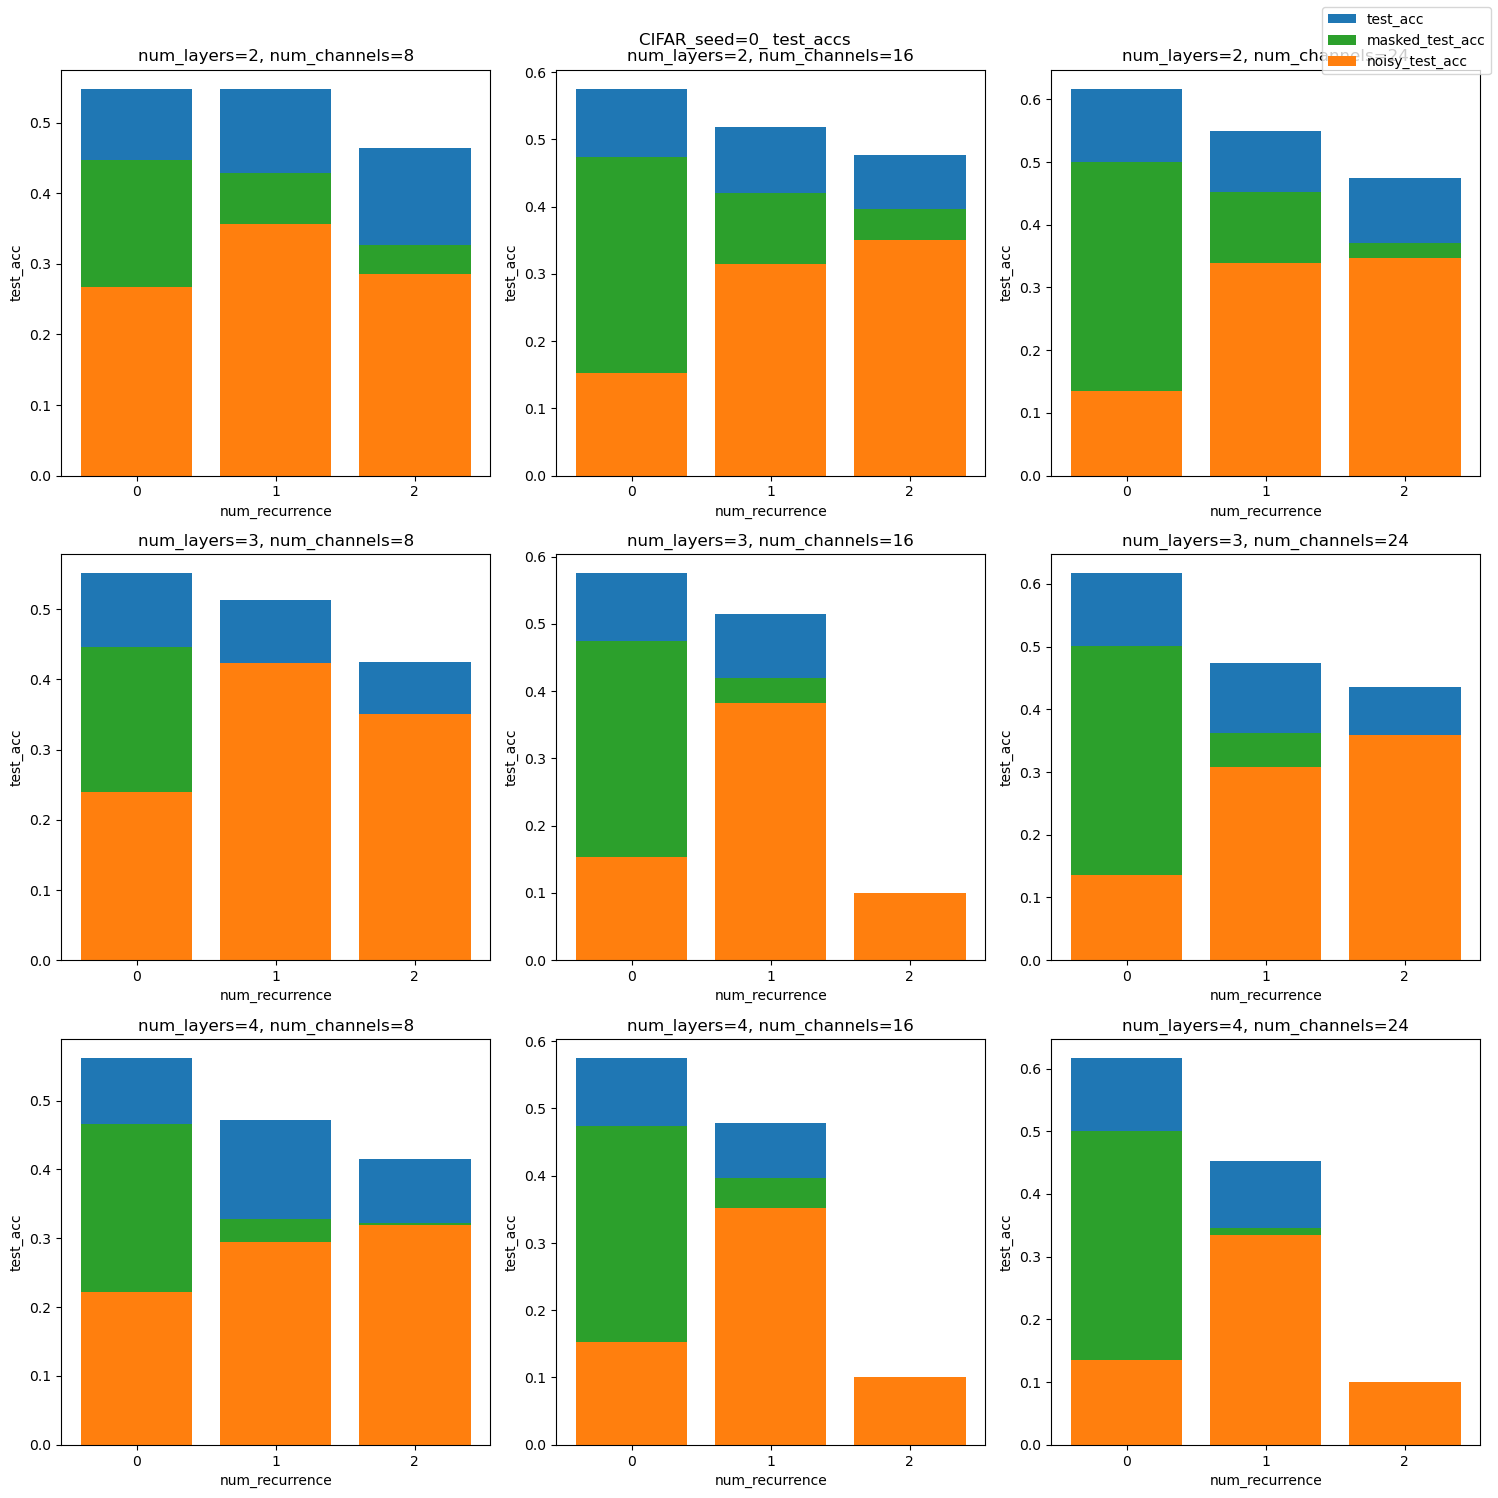

In [5]:
bar_width = 0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(
            f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
        )
        ax.set_xlabel("num_recurrence")
        ax.set_ylabel("test_acc")
        ax.bar(
            np.arange(3),
            combined["test_accs"][num_layers, :, num_channels],
            label="test_acc",
        )
        ax.bar(
            np.arange(3),
            combined["masked_test_accs"][num_layers, :, num_channels],
            label="masked_test_acc",
            color="tab:green",
        )
        ax.bar(
            np.arange(3),
            combined["noisy_test_accs"][num_layers, :, num_channels],
            label="noisy_test_acc",
            color="tab:orange",
        )

        ax.set_xticks(np.arange(3))
fig.suptitle(f"{dataset} test_accs")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
fig.savefig(f"{dataset}accuracy.png")

In [9]:
dataset = "CIFAR_seed=0_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_0 = pkl.load(f)

dataset = "CIFAR_seed=10000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_10k = pkl.load(f)

dataset = "CIFAR_seed=1000000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_1m = pkl.load(f)

In [15]:
# Average across datasets with different seeds
combined_averaged = {}
for key in combined_seed_0.keys():
    combined_averaged[key] = combined_seed_0[key] = (
        combined_seed_0[key] + combined_seed_10k[key] + combined_seed_1m[key]
    ) / 3

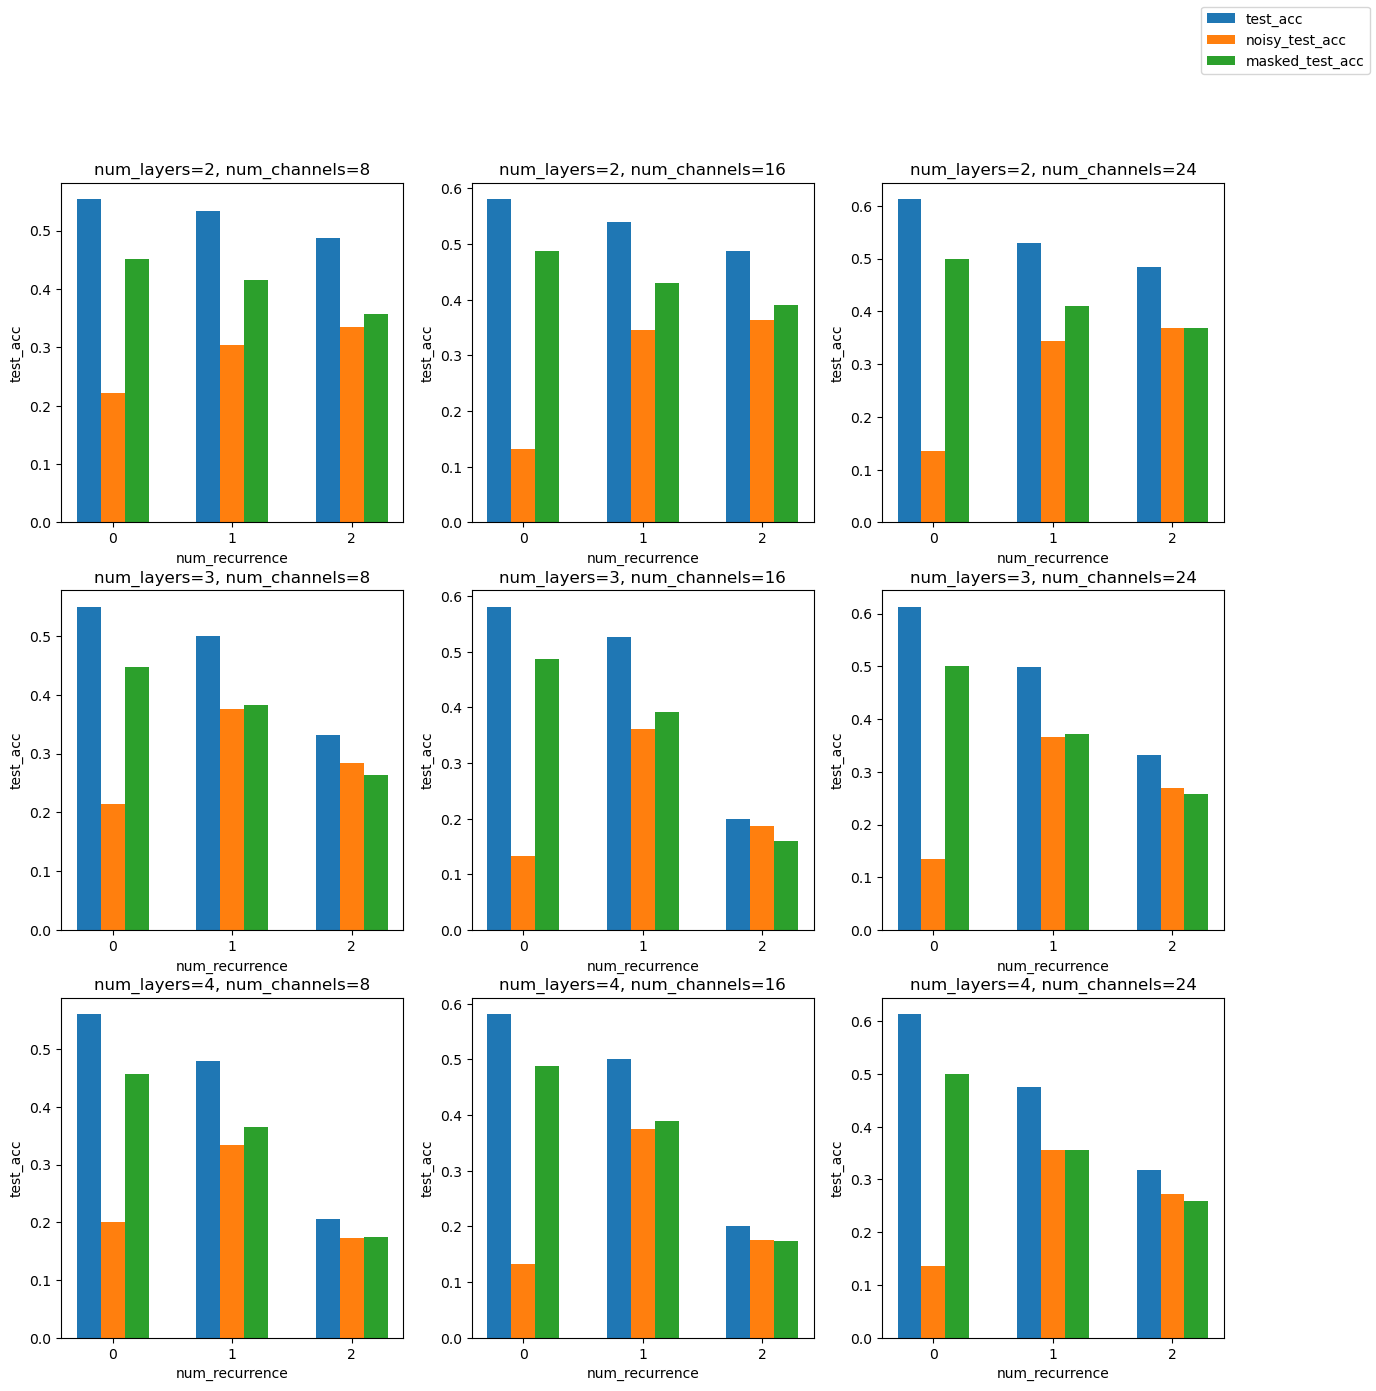

In [17]:
bar_width = 0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(
            f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
        )
        ax.set_xlabel("num_recurrence")
        ax.set_ylabel("test_acc")
        ax.bar(
            np.arange(3) - bar_width,
            combined_averaged["test_accs"][num_layers, :, num_channels],
            label="test_acc",
            width=bar_width,
        )
        ax.bar(
            np.arange(3),
            combined_averaged["noisy_test_accs"][num_layers, :, num_channels],
            label="noisy_test_acc",
            width=bar_width,
        )
        ax.bar(
            np.arange(3) + bar_width,
            combined_averaged["masked_test_accs"][num_layers, :, num_channels],
            label="masked_test_acc",
            width=bar_width,
        )
        ax.set_xticks(np.arange(3))

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig("accuracy_averaged_cifar.png")

In [18]:
# Now for MNIST

In [19]:
dataset = "MNIST_seed=0_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_0 = pkl.load(f)

dataset = "MNIST_seed=10000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_10k = pkl.load(f)

dataset = "MNIST_seed=1000000_"
with open(f"./{dataset}combined_list.pkl", "rb") as f:
    combined_seed_1m = pkl.load(f)

In [20]:
# Average across datasets with different seeds
combined_averaged = {}
for key in combined_seed_0.keys():
    combined_averaged[key] = combined_seed_0[key] = (
        combined_seed_0[key] + combined_seed_10k[key] + combined_seed_1m[key]
    ) / 3

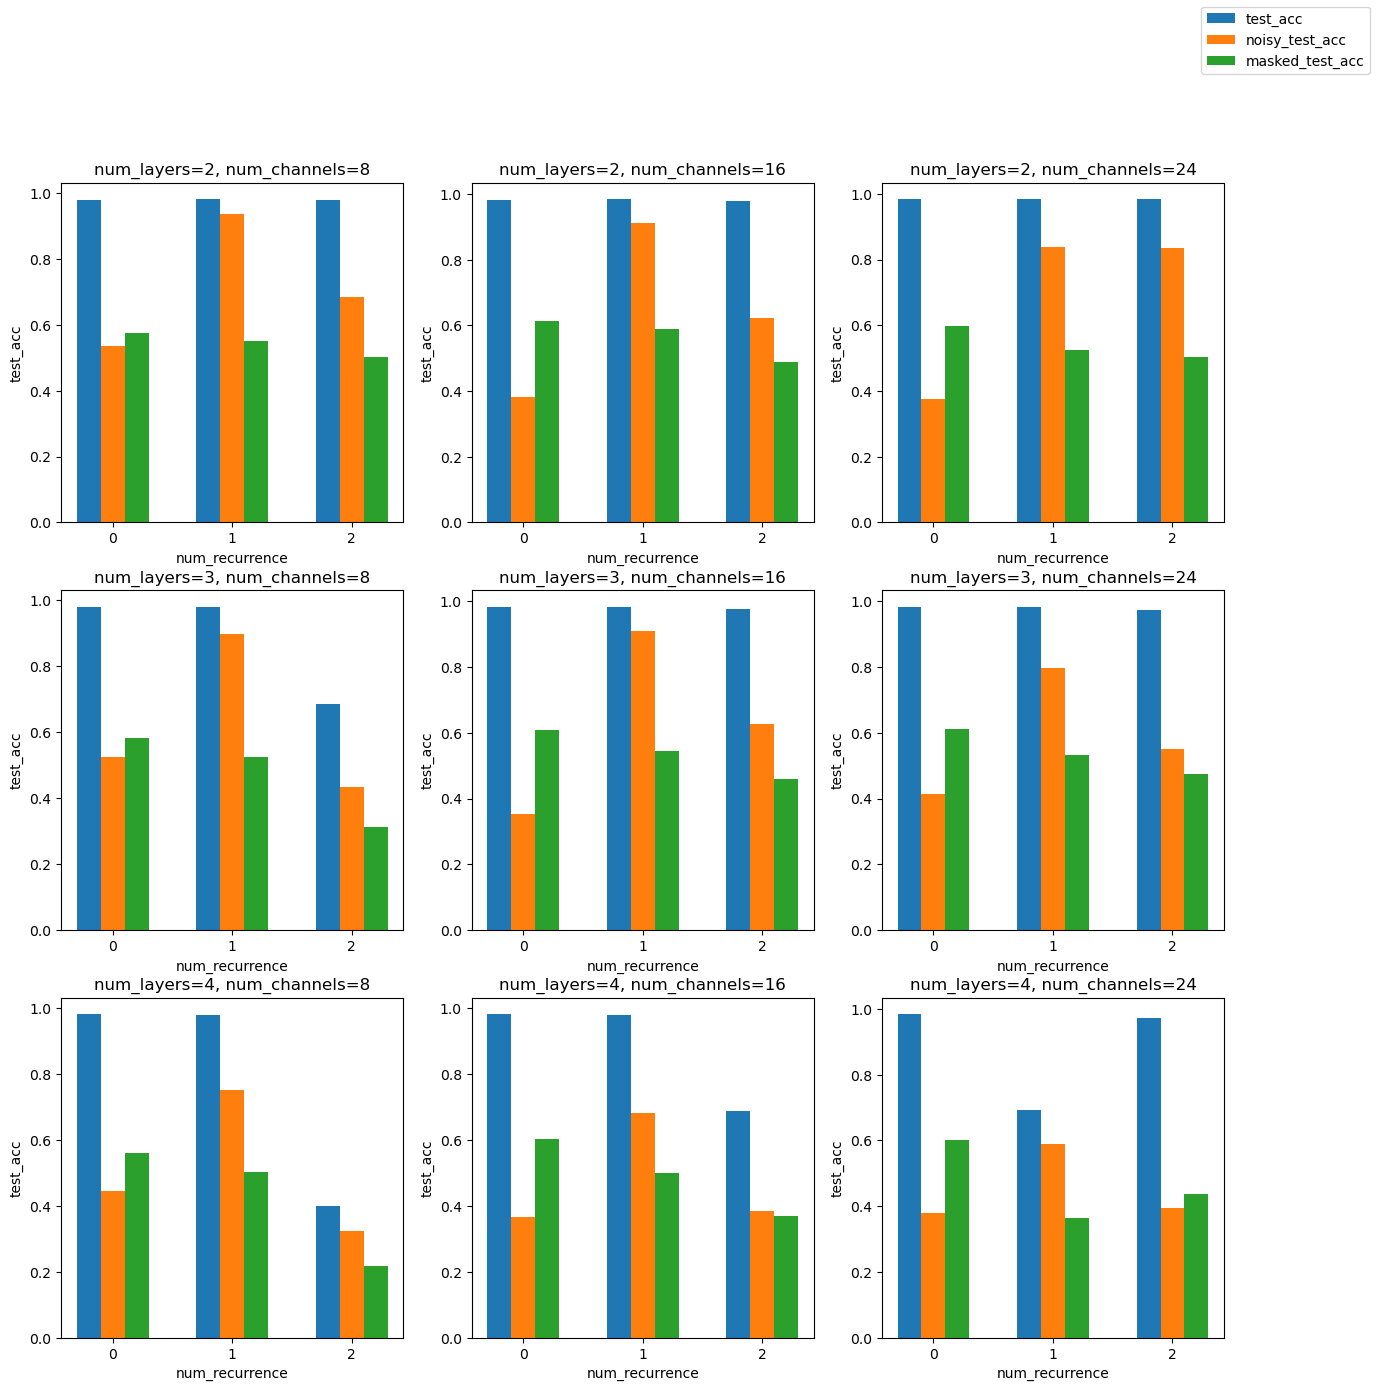

In [21]:
bar_width = 0.2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for num_layers in range(3):
    for num_channels in range(3):
        # print(f'num_layers={num_layers}, num_recurrence={num_recurrence}')
        ax = axes[num_layers, num_channels]
        ax.set_title(
            f"num_layers={num_layers + 2}, num_channels={num_channels * 8 + 8}"
        )
        ax.set_xlabel("num_recurrence")
        ax.set_ylabel("test_acc")
        ax.bar(
            np.arange(3) - bar_width,
            combined_averaged["test_accs"][num_layers, :, num_channels],
            label="test_acc",
            width=bar_width,
        )
        ax.bar(
            np.arange(3),
            combined_averaged["noisy_test_accs"][num_layers, :, num_channels],
            label="noisy_test_acc",
            width=bar_width,
        )
        ax.bar(
            np.arange(3) + bar_width,
            combined_averaged["masked_test_accs"][num_layers, :, num_channels],
            label="masked_test_acc",
            width=bar_width,
        )
        ax.set_xticks(np.arange(3))

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.savefig("accuracy_averaged_mnist.png")